In [209]:
import openmc
import openmc.deplete
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

In [2]:
results = openmc.deplete.ResultsList.from_hdf5('depletion_results.h5')

In [3]:
time_steps = results.get_eigenvalue()[0]
k_vals = results.get_eigenvalue()[1][:,0]
k_errs = results.get_eigenvalue()[1][:,1]

<ErrorbarContainer object of 3 artists>

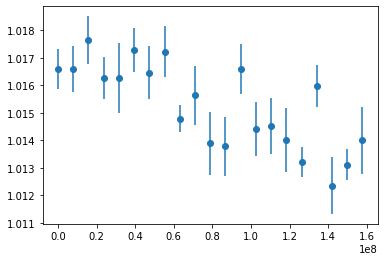

In [4]:
plt.errorbar(time_steps, k_vals, yerr=k_errs, fmt='o')

In [5]:
results.get_depletion_time()

array([0.05938897, 0.05812301, 0.05903926, 0.05826999, 0.0586099 ,
       0.05899708, 0.0585747 , 0.05927247, 0.05911495, 0.05869056,
       0.05853126, 0.0590662 , 0.05853219, 0.05835901, 0.05891202,
       0.05771219, 0.0591495 , 0.05869325, 0.05826938, 0.05941339])

In [6]:
nucs = list(results[0].nuc_to_ind.keys())

In [214]:
#for i in range(1134):
#    results.get_reaction_rate(str(i), 'U235', 'fission')
mats = ['Th225', 'Th227', 'Th229',
        'Pa228', 'Pa230', 'Pa232',
        'U231', 'U232', 'U233', 'U234', 'U235',
        'Np234', 'Np236', 'Np238',
        'Pu237', 'Pu239', 'Pu241',
        'Am240', 'Am242', 'Am244',
        'Cm243', 'Cm245', 'Cm247',
        'Bk246', 'Bk248', 'Bk250',
        'Cf249', 'Cf251', 'Cf253',
        'Es252', 'Es254', 'Es256',
        'Fm255', 'Fm257', 'Fm259']

skips = ['10000', '10001', '10002', '10003', '10004']
#print(mats[0])
total_fiss = eol_fiss = bol_fiss = 0.
fiss_mat_list = []
for i in range(1, 11346):
    if str(i) in skips: continue
    fiss_mat_list.append(results.get_reaction_rate(str(i), 'U235', 'fission')[1][0])
    
    #    eol_fiss_dict[nuc] += fiss_loc[20]
    #    eol_fiss += fiss_loc[20]
    #    bol_fiss += fiss_loc[0]
    #    total_fiss += np.sum(fiss_loc)
len(fiss_mat_list)

11340

In [221]:
z_sum = np.array(fiss_mat_list[:1134])
for i in range(1,10):
    step_array = np.array(fiss_mat_list[1134*i:1134*(i+1)])
    print(np.argsort(step_array)[-10:])
    z_sum += step_array
    
print(z_sum[np.argsort(z_sum)[-10:]], np.argsort(z_sum)[-10:])


[ 621  486  425  456 1114  455  513  649  540  714]
[568 389 621 540 513 455 457 567 485 456]
[679 513 457 455 515 567 514 649 485 621]
[540 455 650 457 681 456 423 485 567 621]
[392 595 716 718 652 567 457 682 458 683]
[428 686 516 460 719 718 684 569 459 685]
[427 720 462 717 430 429 686 461 490 460]
[ 464  680  628  463  461  491 1085  492  725  519]
[574 724 493 520 659 465 630 461 494 602]
[1.67560686e+14 1.67626474e+14 1.68117397e+14 1.68267975e+14
 1.68359830e+14 1.69178318e+14 1.69334641e+14 1.70175046e+14
 1.70247124e+14 1.71592558e+14] [459 421 391 427 389 425 424 426 422 423]


In [168]:
#for i in range(1134):
#    results.get_reaction_rate(str(i), 'U235', 'fission')
mats = ['Th225', 'Th227', 'Th229',
        'Pa228', 'Pa230', 'Pa232',
        'U231', 'U232', 'U233', 'U234', 'U235',
        'Np234', 'Np236', 'Np238',
        'Pu237', 'Pu239', 'Pu241',
        'Am240', 'Am242', 'Am244',
        'Cm243', 'Cm245', 'Cm247',
        'Bk246', 'Bk248', 'Bk250',
        'Cf249', 'Cf251', 'Cf253',
        'Es252', 'Es254', 'Es256',
        'Fm255', 'Fm257', 'Fm259']

skips = ['10000', '10001', '10002', '10003', '10004']
#print(mats[0])
total_fiss = eol_fiss = bol_fiss = 0.
eol_fiss_dict = {}
for nuc in mats:
    eol_fiss_dict[nuc] = 0.
    for i in range(1, 11346):
        if str(i) in skips: continue
        try:
            fiss_loc = results.get_reaction_rate(str(i), nuc, 'fission')[1]
        except:
            continue
        eol_fiss_dict[nuc] += fiss_loc[20]
        eol_fiss += fiss_loc[20]
        bol_fiss += fiss_loc[0]
        total_fiss += np.sum(fiss_loc)

In [179]:
ts = results.get_reaction_rate('100', 'Pu241', 'fission')[0][1]

total_fiss*ts/(bol_atoms+bol_8_atoms)

0.0020741245572675733

In [189]:
sum(list(eol_fiss_dict.values()))/eol_fiss

1.0000000000000575

In [151]:
nuc_dict_t0 = {}
for nuc in nucs:
    num = results.get_atoms('3857', nuc)[1][0]
    if num < 44000: continue
    nuc_dict_t0[nuc] = num

In [154]:
skips = ['10000', '10001', '10002', '10003', '10004']
u_5_bol_conc = []
u_5_eol_conc = []
for i in range(1, 11346):
    if str(i) in skips: continue
    concs = results.get_atoms(str(i), 'U235')[1]
    u_5_bol_conc.append(concs[0])
    u_5_eol_conc.append(concs[20])
    
bol_atoms = sum(u_5_bol_conc)
eol_atoms = sum(u_5_eol_conc)
burnup = 1.-eol_atoms/bol_atoms
print(burnup)

0.012540164475474791


In [178]:
skips = ['10000', '10001', '10002', '10003', '10004']
u_8_bol_conc = []
u_8_eol_conc = []
for i in range(1, 11346):
    if str(i) in skips: continue
    concs = results.get_atoms(str(i), 'U238')[1]
    u_8_bol_conc.append(concs[0])
    u_8_eol_conc.append(concs[20])
    
bol_8_atoms = sum(u_8_bol_conc)
eol_8_atoms = sum(u_8_eol_conc)
#burnup = 1.-eol_atoms/bol_atoms
#print(burnup)

In [149]:
concs = []
labels = []
for k in nuc_dict.keys():
    concs.append(nuc_dict[k])
    labels.append(k)
inds = np.argsort(np.asarray(concs))
for i in range(1,30):
    ind = inds[-1*i]
    print(labels[ind], concs[ind])
eol_total_atom_sum = sum(concs)

O16 2.044866654411899e+24
U238 8.158239055614448e+23
U235 2.013935000356603e+23
U234 1.5509694856642602e+21
Pu239 1.1612756831538754e+21
O17 7.760884889304402e+20
U236 5.719502247693955e+20
Xe134 1.8140216587007043e+20
Ba138 1.5447907932492913e+20
Cs133 1.5445321800118986e+20
Cs135 1.5191217479622368e+20
Xe136 1.4851282144686178e+20
La139 1.4681758869430282e+20
Mo100 1.461718094831046e+20
Zr96 1.4591140985619395e+20
Zr94 1.458834963403192e+20
Zr93 1.437969671762643e+20
Ce140 1.4131451251246388e+20
Tc99 1.4122746845661703e+20
Mo97 1.378293574553392e+20
Zr92 1.3605376477316034e+20
Mo95 1.3587987160059508e+20
Mo98 1.3393494502262586e+20
Cs137 1.3371464767394108e+20
Nd143 1.3335379711266315e+20
Ce142 1.3267407222565986e+20
Pr141 1.3073970746832909e+20
Zr91 1.2455767310018593e+20
Ru101 1.2160714707037336e+20


In [152]:
concs = []
labels = []
for k in nuc_dict_t0.keys():
    concs.append(nuc_dict_t0[k])
    labels.append(k)
inds = np.argsort(np.asarray(concs))
#for i in range(1,30):
#    ind = inds[-1*i]
    #print(labels[ind], concs[ind])
    
total_atom_num = sum(concs)


In [153]:
print(eol_total_atom_sum, total_atom_num)

3.0707898014723815e+24 3.068476972016417e+24


In [212]:
z_0[np.argsort(z_0)[-20:]]

array([1.99915305e+13, 2.00515148e+13, 2.01235853e+13, 2.01251359e+13,
       2.01617809e+13, 2.01970541e+13, 2.02520590e+13, 2.03765985e+13,
       2.03795448e+13, 2.04059394e+13, 2.04253565e+13, 2.04495069e+13,
       2.04805621e+13, 2.07849269e+13, 2.07928968e+13, 2.09743447e+13,
       2.11517952e+13, 2.19024044e+13, 2.30418633e+13, 2.31009029e+13])

In [213]:
t_0_fiss_235 = u_5[:,0]#.reshape((10,1134))
z_0 = t_0_fiss_235[:1134]
z_1 = t_0_fiss_235[1134:2268]
z_2 = t_0_fiss_235[1134*2:1134*3]
z_3 = t_0_fiss_235[1134*3:1134*4]
z_4 = t_0_fiss_235[1134*4:1134*5]
z_5 = t_0_fiss_235[1134*5:1134*6]
z_6 = t_0_fiss_235[1134*6:1134*7]
z_7 = t_0_fiss_235[1134*7:1134*8]
z_8 = t_0_fiss_235[1134*8:1134*9]
z_9 = t_0_fiss_235[1134*9:]

max_indices = []

max_indices.extend(list(np.argsort(z_0)[-10:]))
max_indices.extend(list(np.argsort(z_1)[-10:]))
max_indices.extend(list(np.argsort(z_2)[-10:]))
max_indices.extend(list(np.argsort(z_3)[-10:]))
max_indices.extend(list(np.argsort(z_4)[-10:]))
max_indices.extend(list(np.argsort(z_5)[-10:]))
max_indices.extend(list(np.argsort(z_6)[-10:]))
max_indices.extend(list(np.argsort(z_7)[-10:]))
max_indices.extend(list(np.argsort(z_8)[-10:]))
max_indices.extend(list(np.argsort(z_9)[-10:]))

#print(max_indices)
occurence_count = Counter(max_indices) 
print(occurence_count.most_common(1))

[(621, 4)]


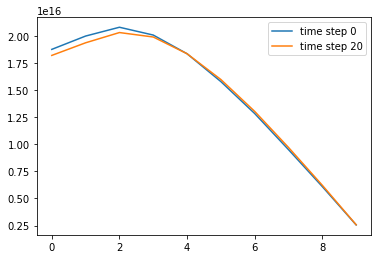

In [200]:
#power_3d = u_5[:,0].reshape((10,1134))
for t in [0,20]:
    power_3d = u_5[:,t].reshape((10,1134))
    fiss_vals = []
    for z in range(10):
        fiss_vals.append(np.sum(power_3d[z,:]))
    plt.plot(fiss_vals, label='time step {}'.format(t))

plt.legend()
#lt.yscale('log')
plt.show()
#plt.legend()

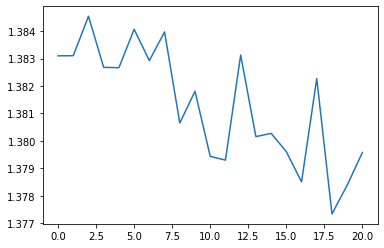

In [163]:
plt.plot(results.get_eigenvalue()[1][:,0]/(1.-0.265))

In [16]:
core_map = """
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, 
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, 
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, 
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f,
f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f,
f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f,
f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, 
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g,
f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f,
f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f,
f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, 
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f,
f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, g, g, g, g, g, g, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f"""
power_3d = []
for z in range(10):
    power_map = []
    c = 0
    for i, l in enumerate(core_map.split(',')):
        #print(l)
        if 'g' in l:
            const = t_0_fiss_235[z, int(c/2)]
            c = c+1
        else:
            const = 0.
        power_map.append(const)
    power_3d.append(np.asarray(power_map).reshape((45,69)))

power_3d_array = np.array(power_3d)
norm_power_3d = power_3d_array/np.sum(power_3d_array)

In [17]:
norm_power_3d.shape

(10, 45, 69)

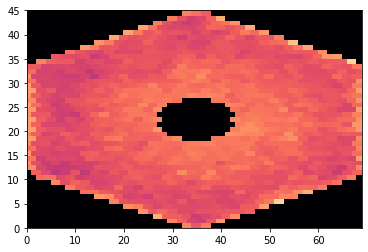

In [18]:
def update_plot(i, power_3d_array, plot):
    plot[0].remove()
    plot[0] = ax.pcolormesh(norm_power_3d[i,:,:], vmin=0.0, vmax=8.704073885087385e-05, cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(111)
frn = 10
fps = 10
plot = [ax.pcolormesh(norm_power_3d[0,:,:], vmin=0.0, vmax=3.6060417e-5, cmap="magma")]
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(power_3d_array, plot), interval=10000/fps)

In [138]:
ani.save('deplete.gif',writer='imagemagick',fps=8)

In [226]:
power_map_0 = []
c = 0
for i, l in enumerate(core_map.split(',')):
    #print(l)
    if 'g' in l:
        if c == 621:
            alpha = 2.
        else: alpha = 1.
        const = z_0[int(c/2)]*alpha
        #print(const)
        c = c+1
    else:
        const = 0.
    power_map_0.append(const)
    #power_3d.append(np.asarray(power_map).reshape((45,69)))
print(np.asarray(power_map_0).shape)
power_map_0 = np.asarray(power_map_0).reshape((45,69))

(3105,)


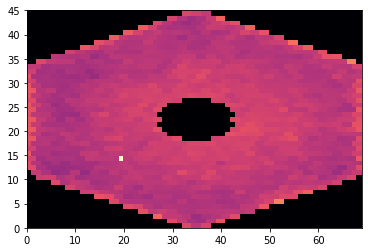

In [227]:
plt.pcolormesh(power_map_0, cmap="magma")

In [87]:
power_map = np.asarray([power_map_0, power_map_1])

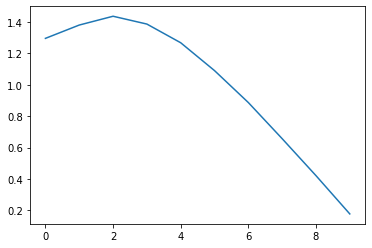

In [41]:
z_engy = []
for i in range(10):
    z_engy.append(np.sum(t_0_fiss_235[i,:]))
    
z_mean = np.sum(t_0_fiss_235[:,:])/10.
    
plt.plot(z_engy/z_mean)

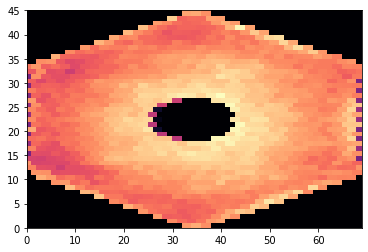

In [92]:
plt.pcolormesh(power_map[1,:,:], cmap="magma")

In [96]:
for i in range(25,46):
    print(power_map[0,16:28,i])

[1.71644800e+13 1.77759255e+13 1.65665046e+13 1.69555037e+13
 1.76428931e+13 1.76446051e+13 1.81687651e+13 1.77773517e+13
 1.71922149e+13 1.72224400e+13 1.83681449e+13 1.80432131e+13]
[1.77374063e+13 1.77759255e+13 1.68903597e+13 1.69555037e+13
 1.95752574e+13 1.76446051e+13 1.89589075e+13 1.77773517e+13
 1.90750664e+13 1.72224400e+13 1.80396907e+13 1.80432131e+13]
[1.77374063e+13 1.75683029e+13 1.68903597e+13 1.73752348e+13
 1.95752574e+13 0.00000000e+00 1.89589075e+13 0.00000000e+00
 1.90750664e+13 1.85561349e+13 1.80396907e+13 1.78868990e+13]
[1.75303065e+13 1.75683029e+13 1.80460269e+13 1.73752348e+13
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.85561349e+13 1.83456995e+13 1.78868990e+13]
[1.75303065e+13 1.74532788e+13 1.80460269e+13 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.83456995e+13 1.78819580e+13]
[1.71285698e+13 1.74532788e+13 1.90830172e+13 0.00000000e+00
 0.00000000e+00 0.0

In [228]:
geom = openmc.Geometry().from_xml()

In [232]:
geom.find((10,0,-70))

[Universe
 	ID             =	6
 	Name           =	
 	Cells          =	[15, 16, 17, 19, 20, 21], Cell
 	ID             =	17
 	Name           =	lattice
 	Fill           =	5
 	Region         =	(-51 52 -53 -54 55 56 ~(-39 40 -41 -42 43 44) -57 58)
 	Rotation       =	None
 	Translation    =	None, (HexLattice
  	ID             =	5
  	Name           =	
  	Orientation    =	x
  	# Rings        =	23
  	# Axial        =	10
  	Center         =	[0.0, 0.0, 0.0]
  	Pitch          =	[2.786, 15.0]
  	Outer          =	4
  	Universes      
                        7 7 7 7 7 7 7 7 7 7 1 1 1 7 7 7 7 7 7 7 7 7 7
                       7 7 7 7 7 7 7 7 7 1 1 1 1 1 1 7 7 7 7 7 7 7 7 7
                      7 7 7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7 7
                     7 7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7
                    7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7
                   7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7
                  7 7 7 7 1 1 1 1 1 1 